In [178]:
import pandas as pd

product_name = 'ICLN'
df = pd.read_csv(f'ICLN_data.csv')

print(f'Number of rows: {df.shape[0]}')
print(f'Missing values: {df["Close"].isnull().sum()}')


# Convert the 'Date' column in prices_df to datetime
df['Date'] = pd.to_datetime(df['Date']).dt.date


# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Reindex to business days to fill missing dates
business_days = pd.bdate_range(start=df.index.min(), end=df.index.max())
df = df.reindex(business_days)

# Fill missing values (e.g., forward fill)
df = df.ffill()

print(f'first date: {df.index.min()}')
print(f'last date: {df.index.max()}')

df.tail()

Number of rows: 4035
Missing values: 0
first date: 2008-06-25 00:00:00
last date: 2024-07-08 00:00:00


,Open,High,Low,Close,Adj Close,Volume,Close_Lag1,Open_Lag1,High_Lag1,Low_Lag1,...,close_ENPH_constituent,close_ORSTED_constituent,close_0C2_constituent,close_ED_constituent,close_^IBEX_constituent,close_FSLR_constituent,close_VWS_constituent,close_XLU_etf,close_XLK_etf,close_XLI_etf
2024-07-02,13.26,13.42,13.18,13.26,13.26,2154900.0,13.31,13.40,13.49,13.29,...,95.769997,371.200012,10.7,88.970001,10912.799805,216.729996,160.250000,68.019997,229.080002,121.220001
2024-07-03,13.36,13.64,13.34,13.59,13.59,4990500.0,13.26,13.26,13.42,13.18,...,99.169998,383.600006,10.7,88.709999,11056.799805,231.110001,162.800003,68.430000,232.169998,121.660004
2024-07-04,13.36,13.64,13.34,13.59,13.59,4990500.0,13.26,13.26,13.42,13.18,...,99.169998,383.600006,10.7,88.709999,11056.799805,231.110001,162.800003,68.430000,232.169998,121.660004
2024-07-05,13.56,13.73,13.53,13.61,13.61,2619900.0,13.59,13.36,13.64,13.34,...,97.139999,399.500000,10.6,89.269997,11023.500000,222.119995,163.899994,68.550003,232.880005,121.220001
2024-07-08,13.58,13.73,13.55,13.70,13.70,4238997.0,13.61,13.56,13.73,13.53,...,102.809998,387.700012,10.5,88.419998,11022.099609,227.119995,162.550003,68.620003,234.470001,121.370003


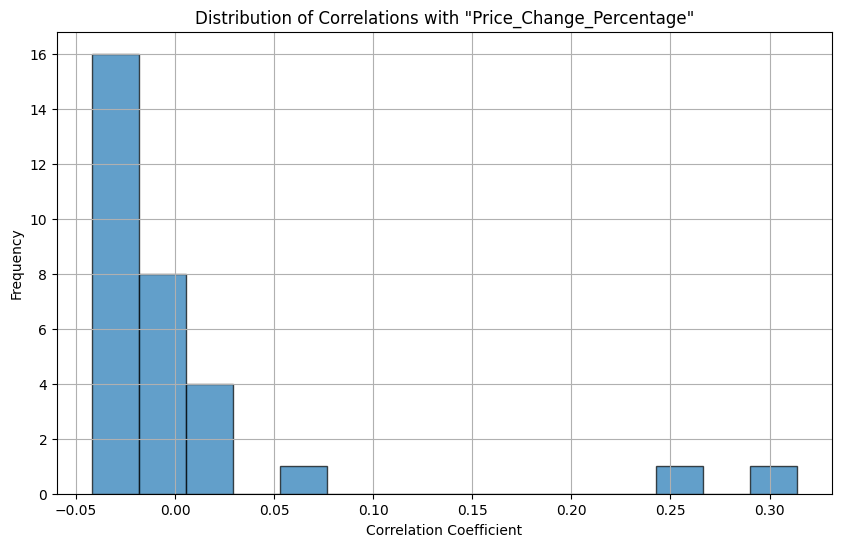

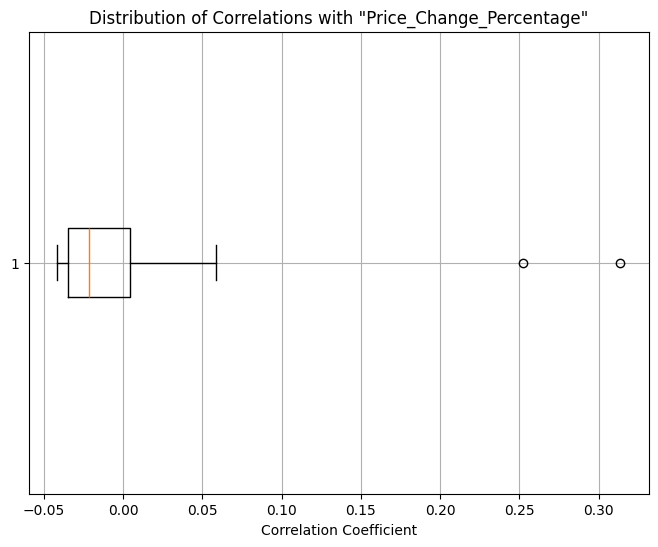

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the price change percentage
df['Price_Change_Percentage'] = df['Close'].pct_change() * 100
df.dropna(inplace=True)  

# Ensure that the column of interest exists in the DataFrame
if column_of_interest not in df.columns:
    raise ValueError(f"Column '{column_of_interest}' not found in the DataFrame.")

# Select numeric columns to compute correlations (excluding the column of interest)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove(column_of_interest)  # Remove the column of interest from the list

# Compute correlations between the column of interest and all other numeric columns
correlations = df[numeric_cols].corrwith(df[column_of_interest])

# Drop any NaN correlations (in case there are columns with constant values)
correlations = correlations.dropna()

# Plot the distribution of correlations
plt.figure(figsize=(10, 6))
plt.hist(correlations, bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title(f'Distribution of Correlations with "{column_of_interest}"')
plt.grid(True)
plt.show()

# Alternatively, you can use a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(correlations, vert=False)
plt.xlabel('Correlation Coefficient')
plt.title(f'Distribution of Correlations with "{column_of_interest}"')
plt.grid(True)
plt.show()


## Generating sentiment scores

Correlation between Price Change and Sentiment Score: 0.1063


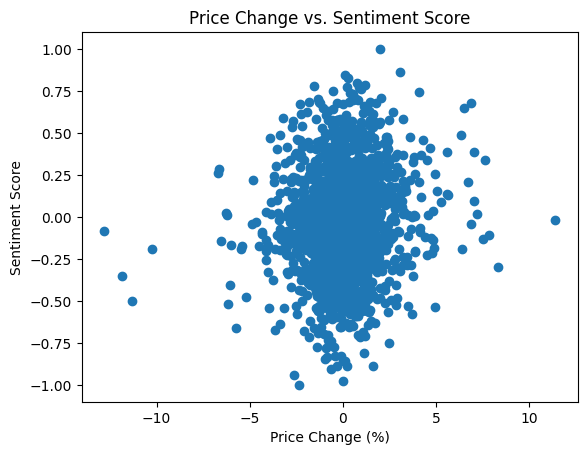

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy sentiment scores
noise_level = 2.0
np.random.seed(0)
sentiment_scores = 0.1 * df['Price_Change_Percentage'] + np.random.normal(0, noise_level, len(df))

sentiment_min = sentiment_scores.min()
sentiment_max = sentiment_scores.max()
df['Sentiment_Score'] = 2 * ((sentiment_scores - sentiment_min) / (sentiment_max - sentiment_min)) - 1

# Calculate the correlation between the price change and sentiment
correlation = np.corrcoef(df['Price_Change_Percentage'], df['Sentiment_Score'])[0, 1]
print(f"Correlation between Price Change and Sentiment Score: {correlation:.4f}")
plt.scatter(df['Price_Change_Percentage'], df['Sentiment_Score'])
plt.title('Price Change vs. Sentiment Score')
plt.xlabel('Price Change (%)')
plt.ylabel('Sentiment Score')

# Save the DataFrame to a CSV file
df.drop(columns=['Price_Change_Percentage'], inplace=True)
df.to_csv('ICLN_data_with_sentiment.csv', index="Date")

In [181]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_Lag1,Open_Lag1,High_Lag1,Low_Lag1,...,close_ORSTED_constituent,close_0C2_constituent,close_ED_constituent,close_^IBEX_constituent,close_FSLR_constituent,close_VWS_constituent,close_XLU_etf,close_XLK_etf,close_XLI_etf,Sentiment_Score
2017-08-29,9.02,9.08,9.00,9.07,8.224794,73500.0,9.07,9.06,9.07,9.04,...,329.700012,10.879,84.419998,10192.599609,48.400002,111.400002,55.119999,58.060001,67.949997,0.527955
2017-08-30,9.08,9.11,9.05,9.11,8.261068,73500.0,9.07,9.02,9.08,9.00,...,329.000000,10.863,84.080002,10245.799805,48.090000,112.300003,54.959999,58.480000,68.230003,0.107535
2017-08-31,9.11,9.13,9.05,9.13,8.279206,443400.0,9.11,9.08,9.11,9.05,...,325.200012,10.814,84.269997,10299.500000,46.959999,113.800003,54.970001,58.830002,68.459999,0.285344
2017-09-01,9.13,9.18,9.12,9.16,8.306409,571800.0,9.13,9.11,9.13,9.05,...,324.399994,10.853,83.989998,10325.500000,47.840000,115.000000,54.799999,58.779999,68.519997,0.682504
2017-09-04,9.13,9.18,9.12,9.16,8.306409,571800.0,9.13,9.11,9.13,9.05,...,324.399994,10.853,83.989998,10325.500000,47.840000,115.000000,54.799999,58.779999,68.519997,0.560385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-02,13.26,13.42,13.18,13.26,13.260000,2154900.0,13.31,13.40,13.49,13.29,...,371.200012,10.700,88.970001,10912.799805,216.729996,160.250000,68.019997,229.080002,121.220001,0.074360
2024-07-03,13.36,13.64,13.34,13.59,13.590000,4990500.0,13.26,13.26,13.42,13.18,...,383.600006,10.700,88.709999,11056.799805,231.110001,162.800003,68.430000,232.169998,121.660004,-0.749488
2024-07-04,13.36,13.64,13.34,13.59,13.590000,4990500.0,13.26,13.26,13.42,13.18,...,383.600006,10.700,88.709999,11056.799805,231.110001,162.800003,68.430000,232.169998,121.660004,0.324574
2024-07-05,13.56,13.73,13.53,13.61,13.610000,2619900.0,13.59,13.36,13.64,13.34,...,399.500000,10.600,89.269997,11023.500000,222.119995,163.899994,68.550003,232.880005,121.220001,-0.018136


In [182]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_Lag1,Open_Lag1,High_Lag1,Low_Lag1,...,close_ORSTED_constituent,close_0C2_constituent,close_ED_constituent,close_^IBEX_constituent,close_FSLR_constituent,close_VWS_constituent,close_XLU_etf,close_XLK_etf,close_XLI_etf,Sentiment_Score
2017-08-29,9.02,9.08,9.00,9.07,8.224794,73500.0,9.07,9.06,9.07,9.04,...,329.700012,10.879,84.419998,10192.599609,48.400002,111.400002,55.119999,58.060001,67.949997,0.527955
2017-08-30,9.08,9.11,9.05,9.11,8.261068,73500.0,9.07,9.02,9.08,9.00,...,329.000000,10.863,84.080002,10245.799805,48.090000,112.300003,54.959999,58.480000,68.230003,0.107535
2017-08-31,9.11,9.13,9.05,9.13,8.279206,443400.0,9.11,9.08,9.11,9.05,...,325.200012,10.814,84.269997,10299.500000,46.959999,113.800003,54.970001,58.830002,68.459999,0.285344
2017-09-01,9.13,9.18,9.12,9.16,8.306409,571800.0,9.13,9.11,9.13,9.05,...,324.399994,10.853,83.989998,10325.500000,47.840000,115.000000,54.799999,58.779999,68.519997,0.682504
2017-09-04,9.13,9.18,9.12,9.16,8.306409,571800.0,9.13,9.11,9.13,9.05,...,324.399994,10.853,83.989998,10325.500000,47.840000,115.000000,54.799999,58.779999,68.519997,0.560385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-02,13.26,13.42,13.18,13.26,13.260000,2154900.0,13.31,13.40,13.49,13.29,...,371.200012,10.700,88.970001,10912.799805,216.729996,160.250000,68.019997,229.080002,121.220001,0.074360
2024-07-03,13.36,13.64,13.34,13.59,13.590000,4990500.0,13.26,13.26,13.42,13.18,...,383.600006,10.700,88.709999,11056.799805,231.110001,162.800003,68.430000,232.169998,121.660004,-0.749488
2024-07-04,13.36,13.64,13.34,13.59,13.590000,4990500.0,13.26,13.26,13.42,13.18,...,383.600006,10.700,88.709999,11056.799805,231.110001,162.800003,68.430000,232.169998,121.660004,0.324574
2024-07-05,13.56,13.73,13.53,13.61,13.610000,2619900.0,13.59,13.36,13.64,13.34,...,399.500000,10.600,89.269997,11023.500000,222.119995,163.899994,68.550003,232.880005,121.220001,-0.018136
